In [186]:
import findspark
findspark.init()


In [187]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from pyspark.sql.functions import isnan, when, count, col ,isnull
from pyspark.sql.functions import *
import pyspark

In [188]:
spark = SparkSession.builder.master("local[2]").appName("Google playstore app rating prediction").getOrCreate()

In [189]:
from pyspark.ml.regression import LinearRegression

In [190]:
#finding datatypes of features
import pandas as pd
#pd.set_option('max_colwidth', -1) # to prevent truncating of columns in jupyter

def count_column_types(spark_df):
    """Count number of columns per type"""
    return pd.DataFrame(spark_df.dtypes).groupby(1, as_index=False)[0].agg({'count':'count', 'names': lambda x: " | ".join(set(x))}).rename(columns={1:"type"})


In [191]:
count_column_types(h)

,type,count,names
0,bigint,13,Size | Last Updated | Rating | Content Rating ...


In [192]:
csvdf = spark.read.format("csv").option("header",True).option("inferSchema",True).load("C:\\Users\\Jaisriram\\Desktop\\desktop\\bigdata\\Google-Play-Store-master\\googleplaystore.csv")


csvdf.show()
def spark_shape(self):
    return (self.count(), len(self.columns))
pyspark.sql.dataframe.DataFrame.shape = spark_shape
csvdf.shape()

+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+------------------+------------------+------------+
|                 App|      Category|Rating|Reviews|Size|   Installs|Type|Price|Content Rating|              Genres|      Last Updated|       Current Ver| Android Ver|
+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+------------------+------------------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159| 19M|    10,000+|Free|    0|      Everyone|        Art & Design|   January 7, 2018|             1.0.0|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967| 14M|   500,000+|Free|    0|      Everyone|Art & Design;Pret...|  January 15, 2018|             2.0.0|4.0.3 and up|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510|8.7M| 5,000,000+|Free|    0|      Everyone|        Art & Design|    August 1, 2018|             1.2.4|4.0.3 

(10841, 13)

In [193]:
#dropping duplicates
hel1=csvdf.dropDuplicates()
hel1.shape()
#ColumnRenamed('Current Ver', 'Cver').show()

#h1.show()

(10358, 13)

In [ ]:
#dropping null values
h1=hel1.na.drop()
#h1=hel.dropna()
h1.shape()
#csvdf.with

In [195]:
h1.select([count(when(isnull(c) | isnan(c) , c)).alias(c) for c in h1.columns]).show()


+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|App|Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|Genres|Last Updated|Current Ver|Android Ver|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|  0|       0|  1465|      0|   0|       0|   1|    0|             0|     0|           0|          7|          2|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+



App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

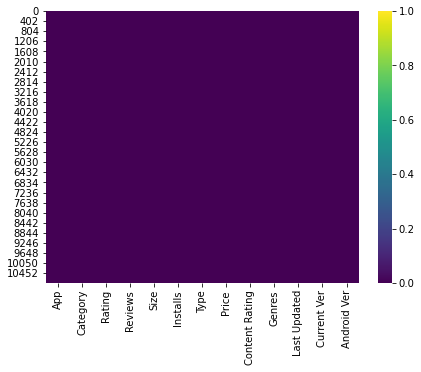

In [196]:
import seaborn as sns
test_df = csvdf.toPandas()
plt.figure(figsize=(7, 5))
sns.heatmap(test_df.isnull(), cmap='viridis')
test_df.isnull().any()
#from pyspark.sql.functions import *
#hel=h1.withColumn('Cver', regexp_replace('Cver', 'NaN' ,'Null'))
#hel.dropna()
#hel.shape()
#hel.select([count(when(isnan(c), c)).alias(c) for c in hel.columns]).show()
#h2=hel.withColumn('Cver', regexp_replace('Cver', 'NaN' ,''))
#h3=hel.withColumn('Android Ver', regexp_replace('Android Ver', 'NaN' ,''))

In [ ]:
#newDf1=hel.dropna()
#h1.select([count(when(isnan(c), c)).alias(c) for c in h1.columns]).show()
#h12=h2.select([count(when(isnan(c), c)).alias(c) for c in h2.columns]).show()
#h2.dropna()
#h2.shape()
#h1.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

In [ ]:
#df=csvdf.dropna()
#df=h.replace(float('NaN'),None)
#df.shape()
#df.registerTempTable("da3")
#res1 = spark.sql('select * from da3 where (Rating == "NaN")')
#res1.shape()
#res1.show()

In [ ]:
#val rows = csvdf.filter(Rating=> Rating != "NaN")

#new = csvdf.filter((csvdf.Rating != 'NaN'))
#new.show()
#new.shape()

In [ ]:
#hel.registerTempTable("da2")
#res = spark.sql('select * from da2 where (Tpye == "Null")')


In [ ]:
I have a dataset with missing values , I would like to get the number of missing values for each columns. Following is what I did , I got the number of non missing values. How can I use it to get the number of missing values?

In [ ]:
I have a dataset with missing values , I would like to get the number of missing values for each columns. Following is what I did , I got the number of non missing values. How can I use it to get the number of missing values

In [ ]:
I have a dataset with missing values , I would like to get the number of missing values for each columns. Following is what I did , I got the number of non missing values. How can I use it to get the number of missing values

In [ ]:
#pip install missingno

In [ ]:

#test_df = csvdf.toPandas()
#test_df = test.toPandas()
#sns.lineplot(x = "Rating", y = "Type" , hue = "CRating", data = test_df)


In [ ]:

#csvdf.where(col("CRating").isNull()).count()

In [ ]:
#csvdf.filter("Rating is null")
#csvdf.filter(csvdf.Rating.isnan()).count()

#csvdf.where(col("Rating").isnan()).count()